# Metric Analysis with Full Dataframe

Resolved metrics directory path: /home/ptr/AnomaLLMy/data/processed


,LLM,Total Response Time,Average Chunk Time,Response Rate,Word Count,Character Count,Sentence Count,Average Word Length,Average Sentence Length,Vocabulary Richness
0,phi3.5_3.8b,303.32,0.2227,2.82,855,6030,23,7.05,37.17,0.4187
1,dolphin-llama3_8b,226.93,0.3318,1.34,303,1980,34,6.53,8.91,0.3498
2,llama3.1_8b,426.47,0.4830,1.14,487,3555,32,7.30,15.22,0.3655
3,moondream2_1.8b,21.17,0.1224,2.08,44,320,4,7.27,11.00,0.3182
4,llama3.2_3b,116.17,0.1360,4.18,485,3296,48,6.80,10.10,0.3835
5,llama3.2_3b,118.53,0.1472,3.64,431,3031,42,7.03,10.26,0.3828
6,llama3.1_8b,397.39,0.3339,1.65,657,4545,71,6.92,9.25,0.2618
7,dolphin-llama3_1b,337.36,0.5190,1.09,368,2728,28,7.41,13.14,0.3967
8,llama3.2_1b,107.81,0.1353,5.25,566,3341,42,5.90,13.48,0.2756
9,llama3.2_1b,67.31,0.1233,4.77,321,1847,50,5.75,6.42,0.2212


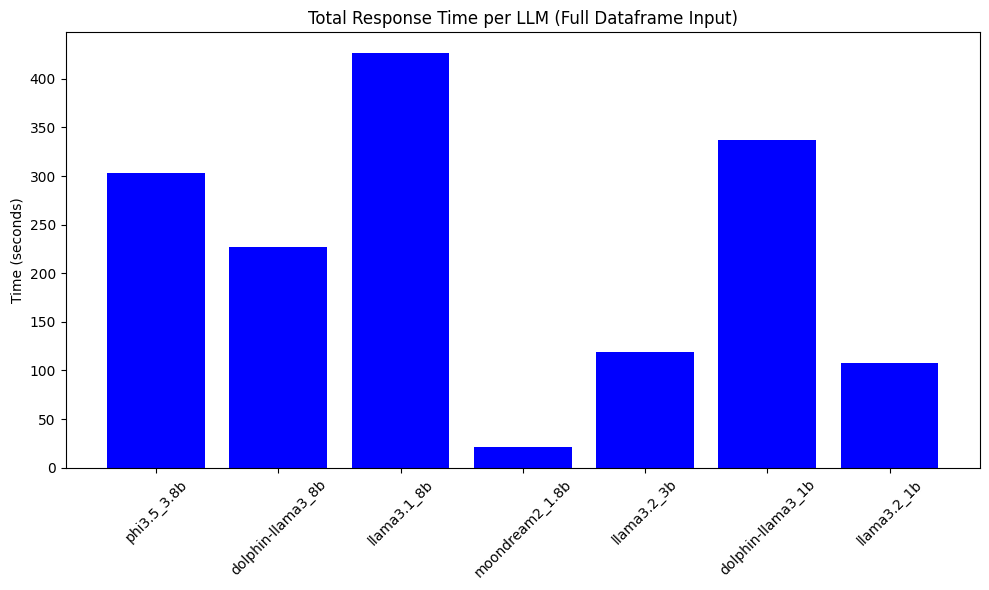

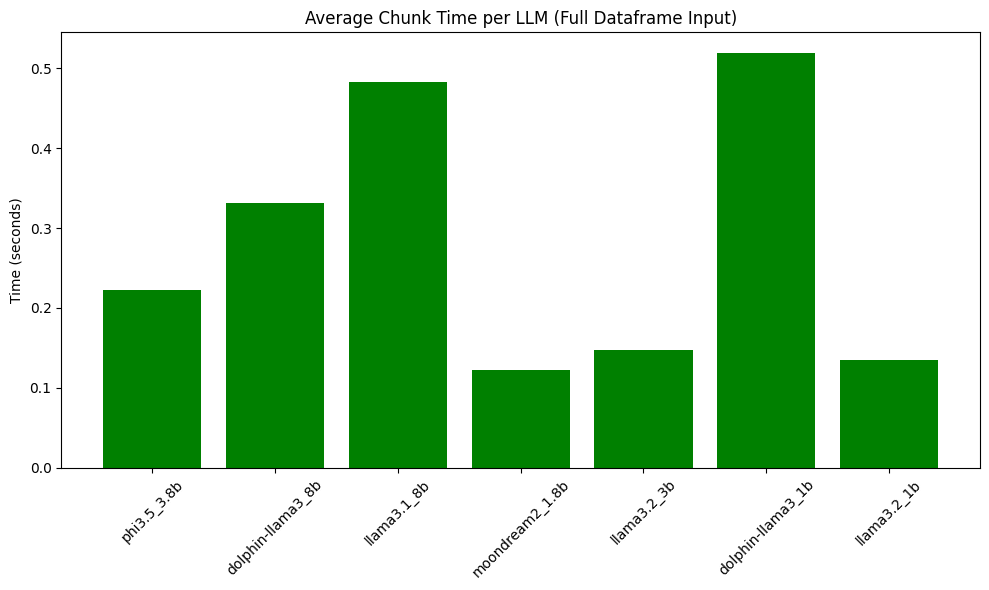

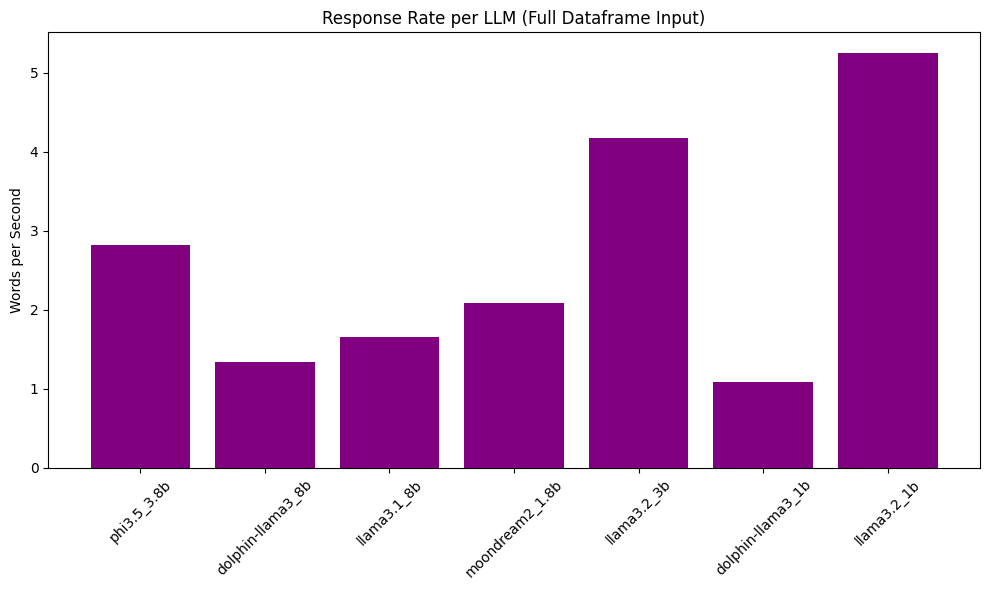

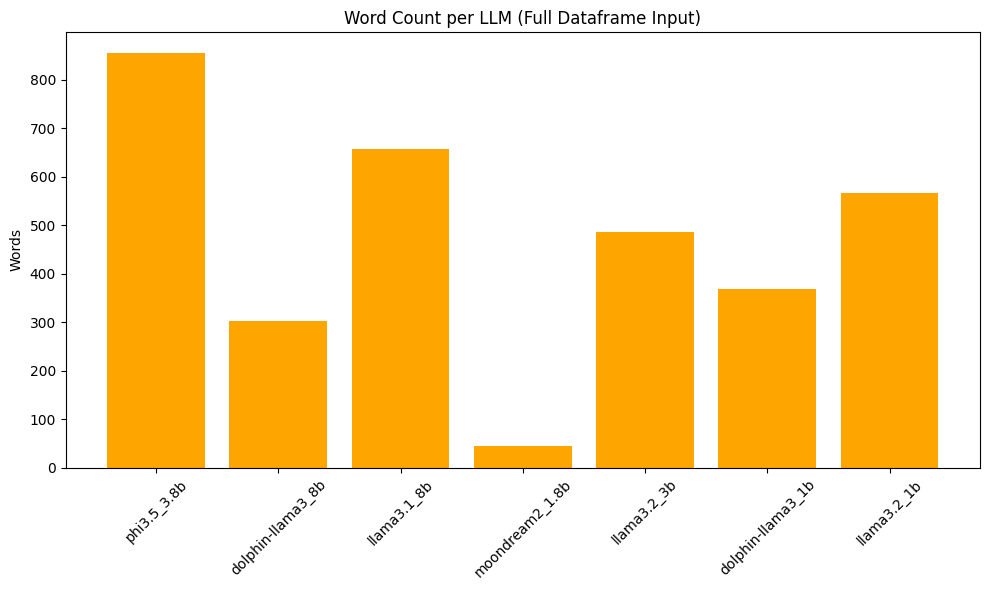

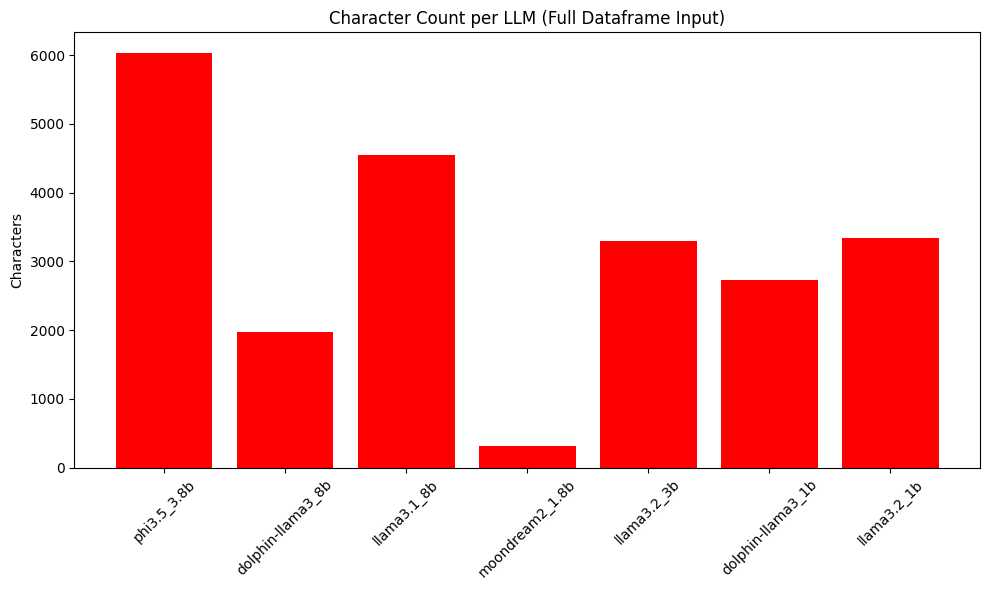

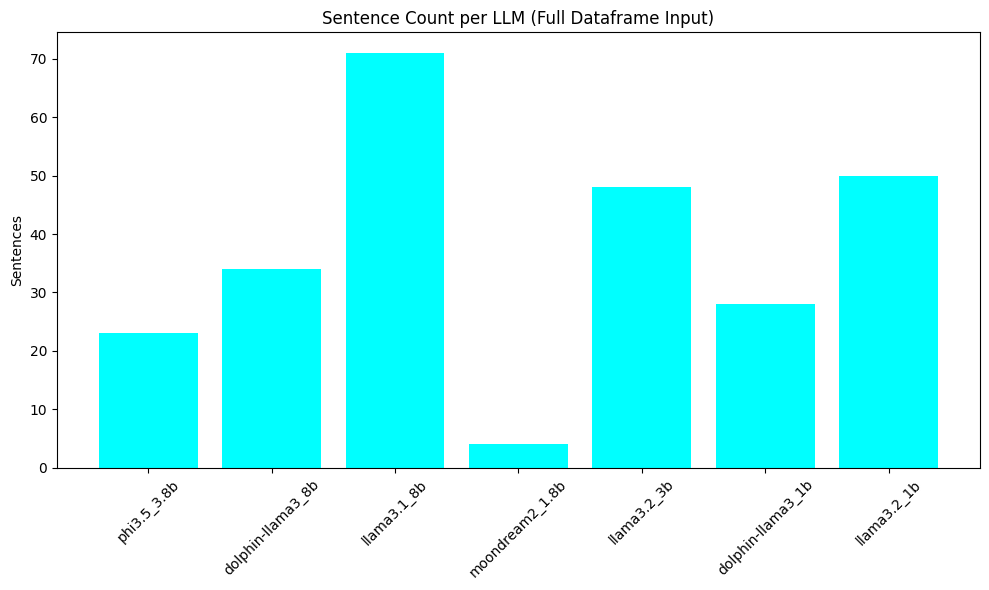

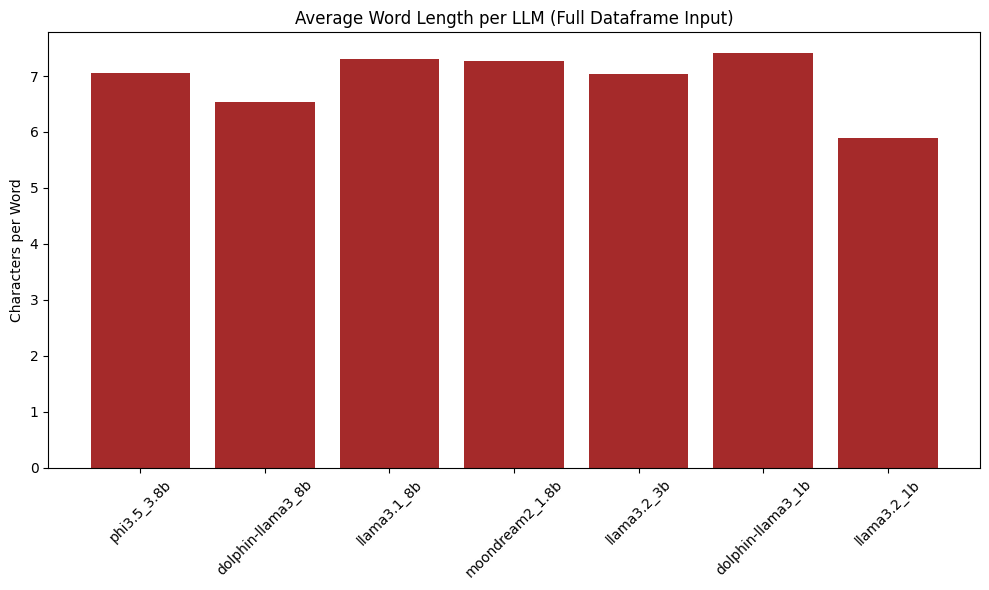

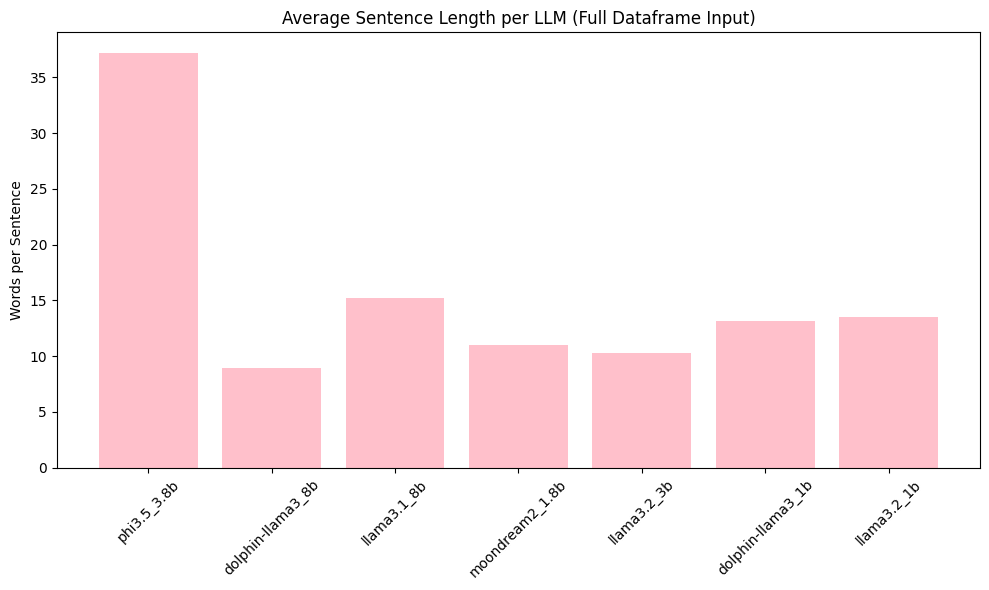

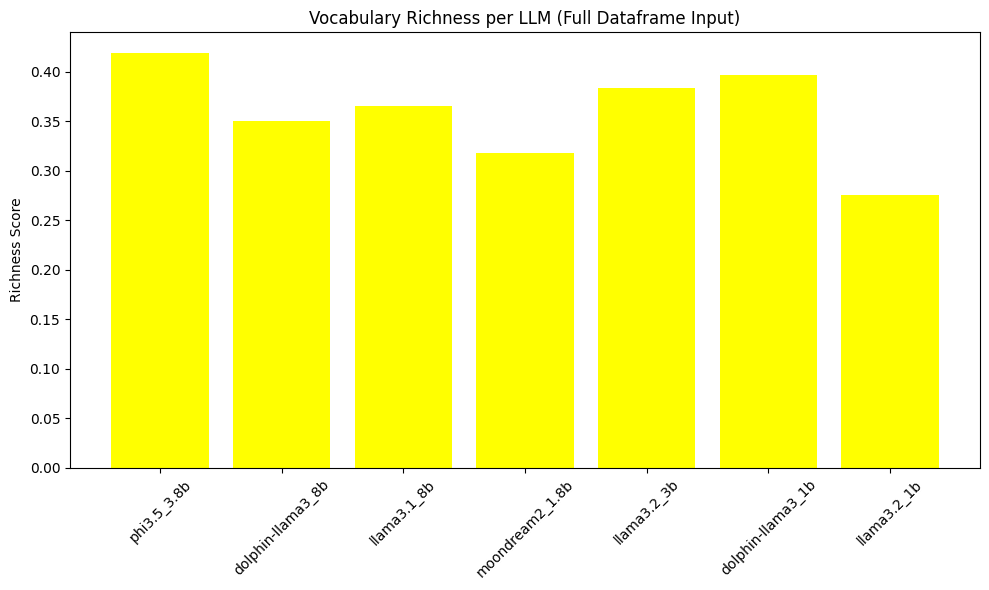

In [25]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Get the current working directory where the Jupyter notebook is located
current_dir = os.getcwd()  # Get the current working directory (where the notebook is)

# Path to the metrics directory relative to the current directory (two levels up, then into data/processed/)
metrics_dir = os.path.abspath(os.path.join(current_dir, '../../data/processed/'))

# Print the resolved path for debugging
print(f"Resolved metrics directory path: {metrics_dir}")

# Check if the directory exists
if not os.path.exists(metrics_dir):
    print(f"Error: The directory {metrics_dir} does not exist.")
else:
    # Define lists to store the metrics
    llm_names = []
    response_times = []
    chunk_times = []
    response_rates = []
    word_counts = []
    char_counts = []
    sentence_counts = []
    avg_word_lengths = []
    avg_sentence_lengths = []
    vocab_richnesses = []

    # Regular expressions to extract the metrics
    metrics_regex = {
        'Total Response Time': r'Total Response Time: ([\d.]+)',
        'Average Chunk Time': r'Average Chunk Time: ([\d.]+)',
        'Response Rate': r'Response Rate: ([\d.]+)',
        'Word Count': r'Word Count: (\d+)',
        'Character Count': r'Character Count: (\d+)',
        'Sentence Count': r'Sentence Count: (\d+)',
        'Average Word Length': r'Average Word Length: ([\d.]+)',
        'Average Sentence Length': r'Average Sentence Length: ([\d.]+)',
        'Vocabulary Richness': r'Vocabulary Richness: ([\d.]+)'
    }

    # Loop through all text files in the directory
    for filename in os.listdir(metrics_dir):
        if filename.endswith('.txt'):
            # Extract only the relevant parts of the filename
            parts = filename.split('_')  # Split the filename by underscores
            llm_name = f"{parts[0]}_{parts[1]}"  # Keep only the first two parts (e.g., llama3.1_8b)
            llm_names.append(llm_name)

            with open(os.path.join(metrics_dir, filename), 'r') as file:
                content = file.read()

                # Extract each metric using regular expressions
                response_time = float(re.search(metrics_regex['Total Response Time'], content).group(1))
                chunk_time = float(re.search(metrics_regex['Average Chunk Time'], content).group(1))
                response_rate = float(re.search(metrics_regex['Response Rate'], content).group(1))
                word_count = int(re.search(metrics_regex['Word Count'], content).group(1))
                char_count = int(re.search(metrics_regex['Character Count'], content).group(1))
                sentence_count = int(re.search(metrics_regex['Sentence Count'], content).group(1))
                avg_word_length = float(re.search(metrics_regex['Average Word Length'], content).group(1))
                avg_sentence_length = float(re.search(metrics_regex['Average Sentence Length'], content).group(1))
                vocab_richness = float(re.search(metrics_regex['Vocabulary Richness'], content).group(1))

                # Append the extracted values to the respective lists
                response_times.append(response_time)
                chunk_times.append(chunk_time)
                response_rates.append(response_rate)
                word_counts.append(word_count)
                char_counts.append(char_count)
                sentence_counts.append(sentence_count)
                avg_word_lengths.append(avg_word_length)
                avg_sentence_lengths.append(avg_sentence_length)
                vocab_richnesses.append(vocab_richness)

    # Create a DataFrame to store the extracted metrics
    metrics_df = pd.DataFrame({
        'LLM': llm_names,
        'Total Response Time': response_times,
        'Average Chunk Time': chunk_times,
        'Response Rate': response_rates,
        'Word Count': word_counts,
        'Character Count': char_counts,
        'Sentence Count': sentence_counts,
        'Average Word Length': avg_word_lengths,
        'Average Sentence Length': avg_sentence_lengths,
        'Vocabulary Richness': vocab_richnesses
    })

    # Display the dataframe using Pandas display()
    display(metrics_df)

    # Plot: Total Response Time per LLM
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df['LLM'], metrics_df['Total Response Time'], color='blue')
    plt.title('Total Response Time per LLM (Full Dataframe Input)')
    plt.ylabel('Time (seconds)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot: Average Chunk Time per LLM
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df['LLM'], metrics_df['Average Chunk Time'], color='green')
    plt.title('Average Chunk Time per LLM (Full Dataframe Input)')
    plt.ylabel('Time (seconds)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot: Response Rate per LLM
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df['LLM'], metrics_df['Response Rate'], color='purple')
    plt.title('Response Rate per LLM (Full Dataframe Input)')
    plt.ylabel('Words per Second')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot: Word Count per LLM
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df['LLM'], metrics_df['Word Count'], color='orange')
    plt.title('Word Count per LLM (Full Dataframe Input)')
    plt.ylabel('Words')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot: Character Count per LLM
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df['LLM'], metrics_df['Character Count'], color='red')
    plt.title('Character Count per LLM (Full Dataframe Input)')
    plt.ylabel('Characters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot: Sentence Count per LLM
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df['LLM'], metrics_df['Sentence Count'], color='cyan')
    plt.title('Sentence Count per LLM (Full Dataframe Input)')
    plt.ylabel('Sentences')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot: Average Word Length per LLM
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df['LLM'], metrics_df['Average Word Length'], color='brown')
    plt.title('Average Word Length per LLM (Full Dataframe Input)')
    plt.ylabel('Characters per Word')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot: Average Sentence Length per LLM
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df['LLM'], metrics_df['Average Sentence Length'], color='pink')
    plt.title('Average Sentence Length per LLM (Full Dataframe Input)')
    plt.ylabel('Words per Sentence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot: Vocabulary Richness per LLM
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df['LLM'], metrics_df['Vocabulary Richness'], color='yellow')
    plt.title('Vocabulary Richness per LLM (Full Dataframe Input)')
    plt.ylabel('Richness Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
